# Projet numérique : choix du pas de temps

Corention Hennion, Léa Mailhol

## Pas fixe

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Schéma d'Euler explicite 

In [11]:
def solve_euler_explicit(f, x0, t0, dt, tf ) :
    n = int((tf - t0) / dt)
    x = np.empty(n)
    x[t0] = x0
    t = [t0 + i * dt for i in range(n)]
    for i in range (n-1) :
        x[i+1] = x[i] + dt * f(t[i],x[i])
    return t, x

Nous testons les performances de notre solver sur l'équation différentielle $$\dot x = 2xt$$
La solution étant la fonction $ t : \mapsto \exp{t^{2}} $

Nous faisons de même avec $$ \dot x = \sin {t}$$

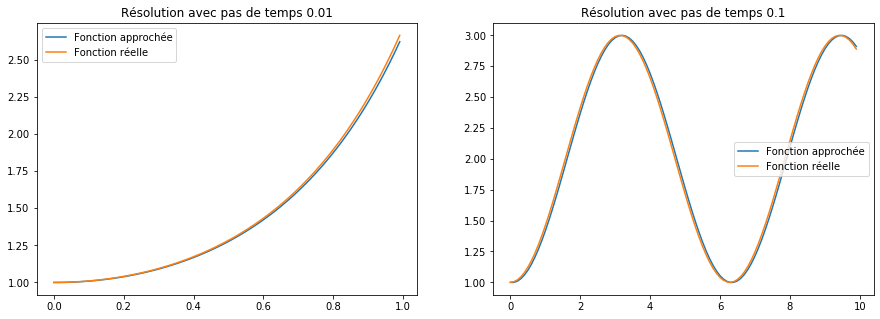

In [40]:
def f(t, x) :
    return 2*t*x

def g(t, x) :
    return np.sin(t)

figure = plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
T, X = solve_euler_explicit( f, 1, 0, 0.01, 1)
plt.title("Résolution avec pas de temps 0.01")
plt.plot(T, X, label = "Fonction approchée" )
Z = np.exp([t**2 for t in T])
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

plt.subplot(1, 2, 2)
T, X = solve_euler_explicit( g, 1, 0, 0.1, 10)
plt.title("Résolution avec pas de temps 0.1")
plt.plot(T, X, label = "Fonction approchée" )
Z = -np.cos([t for t in T]) + 2
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

Ce schéma est convergent à l'ordre 1. Pour illustrer la convergence, nous traçons l'erreur globale en fonction du pas de temps. On voit que cette fonction converge vers 0 quand $\Delta t$ tend vers 0.
Pour illustrer la convergence d'ordre 1, on trace l'erreur globale divisée par le pas de temps en faisant apparaître le majorant $c_v$. 

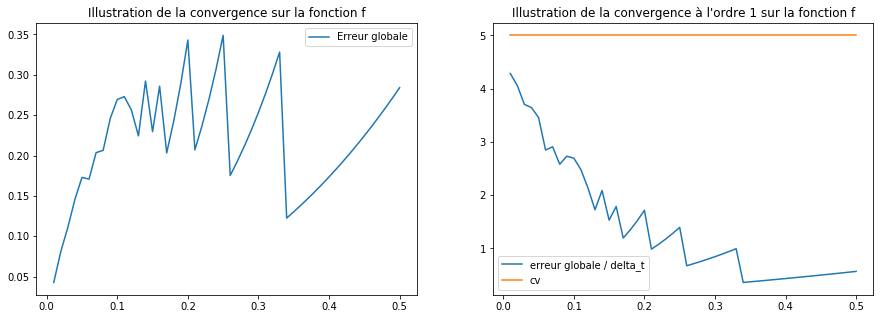

In [38]:
delta = [0.01 + k * 0.01 for k in range (50)]
i = 0
erreur = np.zeros(50)
for deltat in delta :
    T, X = solve_euler_explicit( f, 1, 0, deltat, 1)
    Z = np.exp([t**2 for t in T])
    erreur[i] = np.max(np.abs(Z-X))
    i += 1
    
figure = plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(delta, erreur, label="Erreur globale")
plt.title("Illustration de la convergence sur la fonction f")
plt.legend()

plt.subplot(1,2,2)
plt.title("Illustration de la convergence à l'ordre 1 sur la fonction f")
plt.plot(delta, erreur / delta , label = "erreur globale / delta_t" )
plt.plot(delta, [5 for i in range(len(delta))], label = 'cv')
plt.legend()

Nous implementons maintenant un schéma d'ordre 2 : le méthode de Heun.
On compare la convergence entre cette méthode et la précédente. 

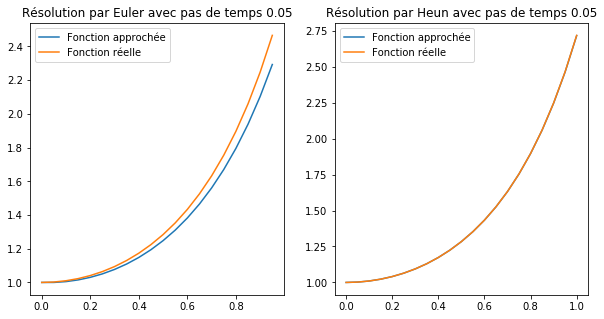

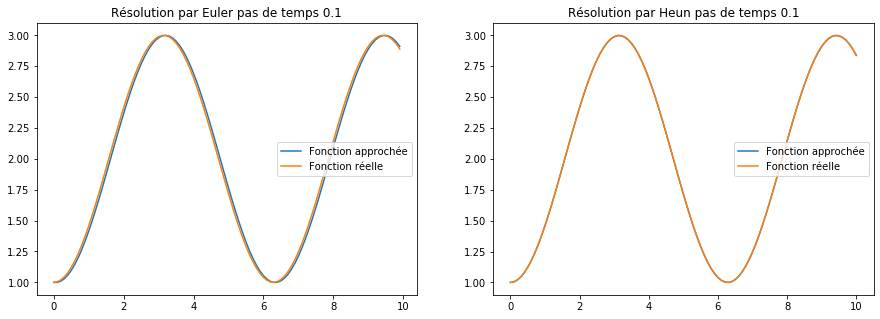

In [35]:
def solve_heun(f, x0, t0, dt, tf) :
    n = int((tf - t0) / dt + 1)
    x = np.empty(n)
    x[0] = x0
    t = [t0 + i * dt for i in range(n)]
    for i in range (n-1) :
        x[i+1] = x[i] + dt / 2 * (f(t[i], x[i]) + f(t[i+1],x[i] + dt * f(t[i], x[i])))
    return t,x

def f(t, x) :
    return 2*t*x

def g(t, x) :
    return np.sin(t)

figure = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
T, X = solve_euler_explicit( f, 1, 0, 0.05, 1)
plt.title("Résolution par Euler avec pas de temps 0.05")
plt.plot(T, X, label = "Fonction approchée" )
Z = np.exp([t**2 for t in T])
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

plt.subplot(1, 2, 2)
T, X = solve_heun( f, 1, 0, 0.05, 1)
plt.title("Résolution par Heun avec pas de temps 0.05")
plt.plot(T, X, label = "Fonction approchée" )
Z = np.exp([t**2 for t in T])
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

figure = plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
T, X = solve_euler_explicit( g, 1, 0, 0.1, 10)
plt.title("Résolution par Euler pas de temps 0.1")
plt.plot(T, X, label = "Fonction approchée" )
Z = -np.cos([t for t in T]) + 2
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

plt.subplot(1, 2, 2)
T, X = solve_heun( g, 1, 0, 0.1, 10)
plt.title("Résolution par Heun pas de temps 0.1")
plt.plot(T, X, label = "Fonction approchée" )
Z = -np.cos([t for t in T]) + 2
plt.plot(T, Z, label = "Fonction réelle")
plt.legend()

Nous remarquons que la convergence est meilleure pour la méthode de Heun qui est d'ordre 2.

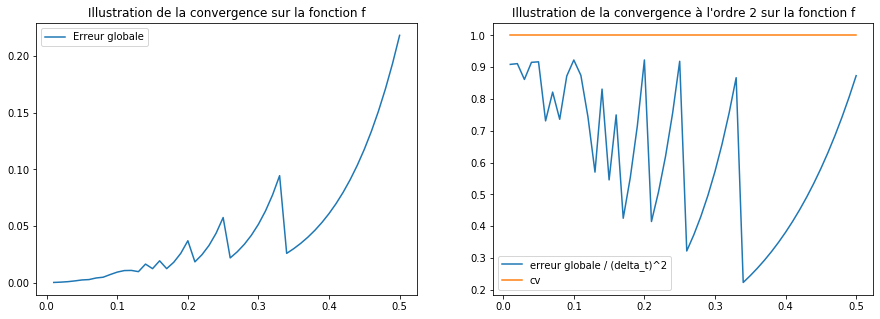

In [48]:
delta = [0.01 + k * 0.01 for k in range (50)]
i = 0
erreur = np.zeros(50)
for deltat in delta :
    T, X = solve_heun( f, 1, 0, deltat, 1)
    Z = np.exp([t**2 for t in T])
    erreur[i] = np.max(np.abs(Z-X))
    i += 1
    
figure = plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(delta, erreur, label="Erreur globale")
plt.title("Illustration de la convergence sur la fonction f")
plt.legend()

plt.subplot(1,2,2)
plt.title("Illustration de la convergence à l'ordre 2 sur la fonction f")
plt.plot(delta, erreur / np.array([t**2 for t in delta]) , label = "erreur globale / (delta_t)^2" )
plt.plot(delta, [1 for i in range(len(delta))], label = 'cv')
plt.legend()

## Adaptation du pas de temps

On cherche à montrer que si f est $C^{1}$, on a pour le shéma d'Euler explicite :
\begin{equation}
\|e^{j+1}\| = \Delta t_j \frac{\|f(t_{j+1},x^{j+1}) - f(t_j,x^{j})\|}{2} + O(\Delta t^{3}_j) 
\end{equation}

On a d'après l'énoncé 
\begin{equation}
e^{j+1} = \int_{t_{j}}^{t_{j+1}}f(s,x(s)) \, ds - x^{j+1} + x^{j}
\end{equation}
et 
\begin{equation}
x^{j+1}=x^{j} + \Delta t_jf(t_j,x^{j})
\end{equation}
D'où 
\begin{equation}
e^{j+1} = \int_{t_{j}}^{t_{j+1}}f(s,x(s)) \, ds - \Delta t_jf(t_j,x^{j})
\end{equation}


Si $$\left\| e ^ { j + 1 } - \frac { \Delta t } { 2 } \left( f \left( t _ { j + 1 } , x ^ { j + 1 } \right) - f ( t _ { j } , x ^ { j } \right) \right\| = 0 \left( \Delta t _ { j } ^ { 3 } \right) $$  Alors par inégalité triangulaire on aura bien $$ \\ { \qquad \left\| e ^ { j + 1 } \right\| = \frac { \Delta t } { 2 } \left\| f \left( t _ { j + 1 } , x ^ { j + 1 } \right) - f \left( t _ { j } , x ^ { j } \right) \right\| + O \left( \Delta t _ { j } ^ { 3 } \right) } 
$$

Tout d'abord $$\\ { \qquad \begin{aligned} e ^ { j + 1 } & = \int _ { t _ { j } } ^ { t _ { j + 1 } } f \left( s , x ( s ) \right) d s - \Delta t _ { j } f \left( t _ { j , } x ^ { j } \right) \\ & = \int _ { t _ { j } } ^ { t _ { j + 1 } } \left( f \left( s _ { , } x ( s ) \right) - f \left( t _ { j , } x ^ { j } \right) \right) d s 
$$

Or comme f est $C ^ { 1 } $ \\ { \text { f(s, } x ( s ) ) - f \left( t _ { j } , x ^ { j } \right) = ( s - t _ { j } ) \frac { \partial f } { \partial t } \left( t _ { j } , x ^ { j } \right) + \left( x ( s ) - x ^ { j } \right) \frac { \partial f } { \partial x } \left( t _ { j } , x ^ { j } \right) + o \left( ( s - t _ { j } ) \left( x ( s ) - x ^ { j } \right) \right) } \end{array}
$$

Donc

$$
\begin{aligned} e ^ { j + 1 } = & \frac { \Delta t _ { j } ^ { 2 } } { 2 } \frac { \partial f } { \partial t } \left( t _ { j } , x ^ { j } \right) + \frac { \partial f } { \partial x } \left( t _ { j , } x ^ { j } \right) \int _ { t _ { j } } ^ { t _ { j + 1 } } \left( x ( s ) - x ^ { j } \right) d s + \int _ { t _ { j } } ^ { t _ { j + 1 } } o \left( \left( s - t _ { j } \right) \left( x ( s ) - x ^ { j } \right) \right) d s \end{aligned}
$$

$$
\begin{array} { l } { \text { or comme } x \text { est } C ^ { 1 } \text { et que } x ^ { j } = x ( t _ { j } ) } \\ { x ( s ) - x ^ { j } = \left( s - t _ { j } \right) f \left( t _ { j } , x ^ { j } \right) + o \left( \Delta t _ { j } ^ { 2 } \right) } \end{array}
$$

$$
\begin{array} { l } { \text { Finalement en intégrant } } \\ { e ^ { j + 1 } = \frac { \Delta t _ { j } ^ { 2 } } { 2 } \frac { \partial f } { \partial t } \left( t _ { j } , x ^ { j } \right) + \frac { \Delta t _ { j } ^ { 2 } } { 2 } f \left( t _ { j } , x ^ { j } \right) \frac { \partial f } { \partial x } \left( t _ { j } , x ^ { j } \right) + o \left( \Delta t _ { j } ^ { 3 } \right) } \end{array}
$$

$$
\begin{array} { l } { \text { Ensuite comme f est } C ^ { 1 } } \\ { \begin{aligned} f \left( t _ { j + 1 } , x ^ { j + 1 } \right) - f \left( t _ { j } , x ^ { j } \right) = & \Delta t _ { j } \frac { \partial f } { \partial t } \left( t _ { j } , x ^ { j } \right) + \Delta t _ { j } f \left( t _ { j } , x ^ { j } \right) \frac { \partial f } { \partial x } \left( t _ { j , } x ^ { j } \right) + o \left( \Delta t _ { j } ^ { 2 } f \left( t _ { j } , x ^ { j } \right) \right) \end{aligned} } \end{array}
$$


$$
\begin{array} { l } { \text { Donc } } \\ { \frac { \Delta t _ { j } } { 2 } \left( f \left( t _ { j + 1 , } x ^ { j + 1 } \right) - f \left( t _ { j , } , x ^ { j } \right) \right) = \frac { \Delta t _ { j } ^ { 2 } } { 2 } \left( \frac { \partial f } { \partial t } \left( t _ { j } , x ^ { j } \right) + f \left( t _ { j } , x ^ { j } \right) \frac { \partial f } { \partial x } \left( t _ { j } , x ^ { j } \right) \right) + o \left( \Delta t _ { j } ^ { 3 } \right) } \end{array}
$$

D'où

$$
e ^ { j + 1 } - \frac { \Delta t _ { j } } { 2 } \left( f \left( t _ { j + 1 } , x ^ { j + 1 } \right) - f \left( t _ { j } , x ^ { j } \right) \right) = o \left( \Delta t _ { j } ^ { 3 } \right)
$$


$$
\left\| e ^ { j + 1 } \right\| = \frac { \Delta t _ { j } } { 2 } \left\| f \left( t _ { j + 1 } , x ^ { j + 1 } \right) - f \left( t _ { j } , x ^ { j } \right) \right\| + 0 \left( \Delta t _ { j } ^ { 3 } \right)
$$